##  Decision Tree
**Este estudo utilizas como baseline as permissões contidas no dataset Drebin_215**

In [1]:
import sklearn
import timeit
import pickle
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn.datasets import make_regression, load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.feature_selection import f_regression, f_classif, SelectKBest, VarianceThreshold, mutual_info_regression, SelectPercentile, mutual_info_classif
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy  as np
import os, sys, stat

## Load the datasets

**Carrega o dataset Drebin filtrado pelas permissões.**

In [3]:
dataset_df = pd.read_csv('datasets/DrebinDatasetPermissoes.csv', encoding = 'utf8')

**Carrega o dataset SigPID.**

In [4]:
dataset_sigpid = pd.read_csv("datasets/SigPID.csv", encoding = 'utf8')

**Carrega o dataset Perigosas da Google.**

In [5]:
dataset_per_Perigosas = pd.read_csv("datasets/PerigosasGoogle.csv", encoding = 'utf8')

**Carrega o dataset intersecção de permissões recorrentes.**

In [6]:
dataset_per_Recorrentes = pd.read_csv("datasets/PermissoesRecorrentes.csv", encoding = 'utf8')

##  Baseline 113 permissões

In [7]:
with open('datasets/resultados/temposDT.txt', 'a') as arquivo:
    start_time = timeit.default_timer()

    #state = np.random.randint(100)
    Y = dataset_df['class']
    X = dataset_df.drop(['class'], axis=1)
    # dividir entre conjuntos de treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=1)

    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1)
    #iniciar o classificador
    clf1 = DecisionTreeClassifier()
    #treinamento
    clf1.fit(X_train,y_train)

    # rótulos de predição para X_test
    y_pred=clf1.predict(X_test)
    
    

    #Metricas
    """
    tn = Verdadeiro Negativo uma previsão correta prevista como benigno

    fp = Falso Positivo um falso alarme um benigno previsto como malicioso

    tp = Verdadeiro Positivo uma previsão correta (malicioso)

    fn = Falso Negativo um rótulo malicioso previsto como benigno

    """

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    elapsed = timeit.default_timer() - start_time

    print('DT_113',elapsed, file=arquivo)
    print('____________________DecisionTree 113 Permissões__________________')
    print('Treino',  y_train.shape)
    print('Teste',  y_test.shape)
    print('__________________________________________________')
    print("TN = ",tn)
    print("TP = ",tp)
    print("FP = ",fp)
    print("FN = ",fn)
    print('__________________________________________________')
    print(classification_report(y_test, y_pred))

____________________DecisionTree 113 Permissões__________________
Treino (7367,)
Teste (4511,)
__________________________________________________
TN =  2726
TP =  1524
FP =  112
FN =  149
__________________________________________________
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      2838
           1       0.93      0.91      0.92      1673

    accuracy                           0.94      4511
   macro avg       0.94      0.94      0.94      4511
weighted avg       0.94      0.94      0.94      4511



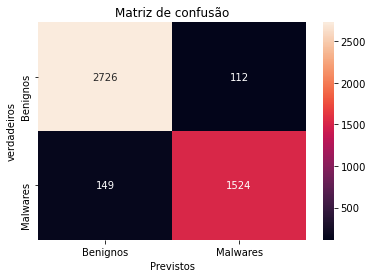

In [10]:
   
matriz_all_perm = confusion_matrix(y_test, y_pred) 

ax= plt.subplot()
sns.heatmap(matriz_all_perm, annot=True, fmt='g', ax=ax); 
ax.set_xlabel('Previstos');ax.set_ylabel('verdadeiros'); 
ax.set_title('Matriz de confusão'); 
ax.xaxis.set_ticklabels(['Benignos', 'Malwares']); ax.yaxis.set_ticklabels(['Benignos','Malwares']);
plt.savefig(os.path.join('datasets/resultados/Matriz_all_PER2.png'), dpi=300, format='png', bbox_inches='tight')

##  SigPID 22 permissões

In [11]:
with open('datasets/resultados/temposDT.txt', 'a') as arquivo:
    start_time = timeit.default_timer()
    #state = np.random.randint(100)
    Y = dataset_sigpid['class']
    X = dataset_sigpid.drop(['class'], axis=1)
    # dividir entre conjuntos de treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=1)

    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1)
    #iniciar o classificador
    DecisionTree = DecisionTreeClassifier()
    #treinamento
    clf1.fit(X_train,y_train)

    # rótulos de predição para X_test
    sigpid_predic=clf1.predict(X_test)

    #Metricas
    """
    tn = Verdadeiro Negativo uma previsão correta prevista como benigno

    fp = Falso Positivo um falso alarme um benigno previsto como malicioso

    tp = Verdadeiro Positivo uma previsão correta (malicioso)

    fn = Falso Negativo um rótulo malicioso previsto como benigno

    """

    tn, fp, fn, tp = confusion_matrix(y_test, sigpid_predic).ravel()
    elapsed = timeit.default_timer() - start_time

    print('DT_SigPID',elapsed, file=arquivo)
    print('____________________RandomForest SigPID 22 Permissões__________________')
    print('Treino',  y_train.shape)
    print('Teste',  y_test.shape)
    print('__________________________________________________')
    print("TN = ",tn)
    print("TP = ",tp)
    print("FP = ",fp)
    print("FN = ",fn)
    print('__________________________________________________')
    print(classification_report(y_test, sigpid_predic))

____________________RandomForest SigPID 22 Permissões__________________
Treino (7367,)
Teste (4511,)
__________________________________________________
TN =  2765
TP =  1384
FP =  73
FN =  289
__________________________________________________
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2838
           1       0.95      0.83      0.88      1673

    accuracy                           0.92      4511
   macro avg       0.93      0.90      0.91      4511
weighted avg       0.92      0.92      0.92      4511



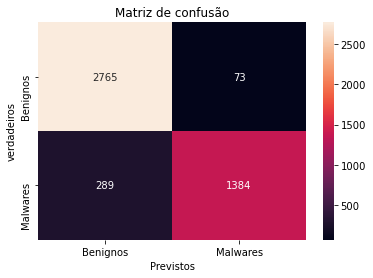

In [12]:
   
confusion = confusion_matrix(y_test, sigpid_predic) 

ax= plt.subplot()
sns.heatmap(confusion, annot=True, fmt='g', ax=ax); 
ax.set_xlabel('Previstos');ax.set_ylabel('verdadeiros'); 
ax.set_title('Matriz de confusão'); 
ax.xaxis.set_ticklabels(['Benignos', 'Malwares']); ax.yaxis.set_ticklabels(['Benignos','Malwares']);
plt.savefig(os.path.join('datasets/resultados/Matriz_SigPID_PER.png'), dpi=300, format='png', bbox_inches='tight')

##  Perigossas da Google 22 permissões

In [14]:
with open('datasets/resultados/temposDT.txt', 'a') as arquivo:
    start_time = timeit.default_timer()
    #state = np.random.randint(100)
    Y = dataset_per_Perigosas['class']
    X = dataset_per_Perigosas.drop(['class'], axis=1)
    # dividir entre conjuntos de treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=1)

    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1)
    #iniciar o classificador
    DecisionTree = DecisionTreeClassifier()
    #treinamento
    clf1.fit(X_train,y_train)

    # rótulos de predição para X_test
    perigosas_predic=clf1.predict(X_test)

    #Metricas
    """
    tn = Verdadeiro Negativo uma previsão correta prevista como benigno

    fp = Falso Positivo um falso alarme um benigno previsto como malicioso

    tp = Verdadeiro Positivo uma previsão correta (malicioso)

    fn = Falso Negativo um rótulo malicioso previsto como benigno

    """

    tn, fp, fn, tp = confusion_matrix(y_test, perigosas_predic).ravel()
    elapsed = timeit.default_timer() - start_time

    print('DT_Perigossas',elapsed, file=arquivo)
    print('____________________RandomForest Perigossas da Google 22 Permissões__________________')
    print('Treino',  y_train.shape)
    print('Teste',  y_test.shape)
    print('__________________________________________________')
    print("TN = ",tn)
    print("TP = ",tp)
    print("FP = ",fp)
    print("FN = ",fn)
    print('__________________________________________________')
    print(classification_report(y_test, perigosas_predic))

____________________RandomForest Perigossas da Google 22 Permissões__________________
Treino (7367,)
Teste (4511,)
__________________________________________________
TN =  2730
TP =  1230
FP =  108
FN =  443
__________________________________________________
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      2838
           1       0.92      0.74      0.82      1673

    accuracy                           0.88      4511
   macro avg       0.89      0.85      0.86      4511
weighted avg       0.88      0.88      0.87      4511



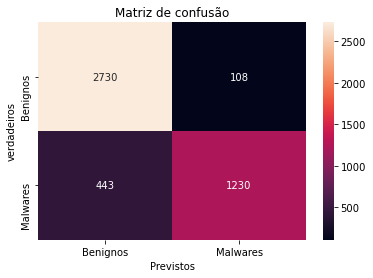

In [16]:
   
confusion = confusion_matrix(y_test, perigosas_predic) 

ax= plt.subplot()
sns.heatmap(confusion, annot=True, fmt='g', ax=ax); 
ax.set_xlabel('Previstos');ax.set_ylabel('verdadeiros'); 
ax.set_title('Matriz de confusão'); 
ax.xaxis.set_ticklabels(['Benignos', 'Malwares']); ax.yaxis.set_ticklabels(['Benignos','Malwares']);
plt.savefig(os.path.join('datasets/resultados/Matriz_Perigosas_PER.png'), dpi=300, format='png', bbox_inches='tight')

##   Recorrentes 32 permissões

In [20]:
with open('datasets/resultados/temposDT.txt', 'a') as arquivo:
    start_time = timeit.default_timer()
    #state = np.random.randint(100)
    Y = dataset_per_Recorrentes['class']
    X = dataset_per_Recorrentes.drop(['class'], axis=1)
    # dividir entre conjuntos de treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=1)

    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1)
    #iniciar o classificador
    RandomForest = DecisionTreeClassifier()
    #treinamento
    clf1.fit(X_train,y_train)

    # rótulos de predição para X_test
    recorrentes_predic=clf1.predict(X_test)

    #Metricas
    """
    tn = Verdadeiro Negativo uma previsão correta prevista como benigno

    fp = Falso Positivo um falso alarme um benigno previsto como malicioso

    tp = Verdadeiro Positivo uma previsão correta (malicioso)

    fn = Falso Negativo um rótulo malicioso previsto como benigno

    """

    tn, fp, fn, tp = confusion_matrix(y_test, recorrentes_predic).ravel()
    elapsed = timeit.default_timer() - start_time

    print('DT_Recorrentes',elapsed, file=arquivo)
    print('____________________RandomForest Recorrentes 32 Permissões__________________')
    print('Treino',  y_train.shape)
    print('Teste',  y_test.shape)
    print('__________________________________________________')
    print("TN = ",tn)
    print("TP = ",tp)
    print("FP = ",fp)
    print("FN = ",fn)
    print('__________________________________________________')
    print(classification_report(y_test, recorrentes_predic))

____________________RandomForest Recorrentes 32 Permissões__________________
Treino (7367,)
Teste (4511,)
__________________________________________________
TN =  2738
TP =  1474
FP =  100
FN =  199
__________________________________________________
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      2838
           1       0.94      0.88      0.91      1673

    accuracy                           0.93      4511
   macro avg       0.93      0.92      0.93      4511
weighted avg       0.93      0.93      0.93      4511



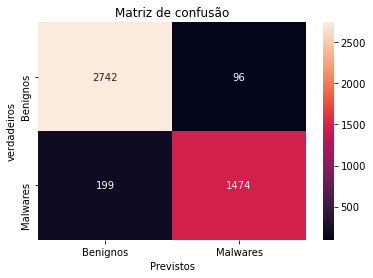

In [18]:
   
confusion = confusion_matrix(y_test, recorrentes_predic) 

ax= plt.subplot()
sns.heatmap(confusion, annot=True, fmt='g', ax=ax); 
ax.set_xlabel('Previstos');ax.set_ylabel('verdadeiros'); 
ax.set_title('Matriz de confusão'); 
ax.xaxis.set_ticklabels(['Benignos', 'Malwares']); ax.yaxis.set_ticklabels(['Benignos','Malwares']);
plt.savefig(os.path.join('datasets/resultados/Matriz_Recorrentes_PER.png'), dpi=300, format='png', bbox_inches='tight')

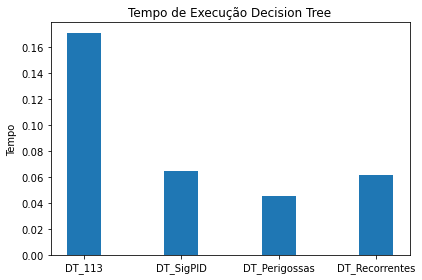

In [19]:
import pylab as pl

dados = []
valores = []

try :
    with open('datasets/resultados/temposDT.txt', 'r') as openedFile :
        for line in openedFile :
            tab = line.split()
            dados.append(str(tab[0]))
            valores.append(float(tab[1]))
except IOError :
    print("IOError!")

x = dados
y = valores

width = 0.35  # the width of the bars

fig, ax = plt.subplots()
#rects1 = ax.bar(x, y, width)
rects2 = ax.bar(x , y, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Tempo')
ax.set_title('Tempo de Execução Decision Tree')
fig.tight_layout()
fig.savefig(os.path.join('datasets/resultados/Execucao_DT.png'), dpi=300, format='png', bbox_inches='tight')